In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
iris=load_iris()

In [3]:
x=iris.data
y=iris.target

### cheaking accuracy of model

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=4)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


In [22]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2 ,random_state=1)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

1.0


In [26]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2 ,random_state=7)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9


### AS we can see if we run the model again we get differnt accuracy  that why testing accuracy is high variance estimate, So here to find out correct accuracy  by taking avg of all test_train data ser and can do this by using  CrossValidation 


## Parameter Tunning

In [29]:
from sklearn.model_selection import cross_val_score

In [32]:
knn=KNeighborsClassifier(n_neighbors=5)
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
score

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [33]:
score.mean()

0.9666666666666668

### Finding the optimal value of K for KNN using CrossValidation 

In [36]:
k_range=range(1,31)
k_score=[]
for i in k_range:
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_score.append(score.mean())
print(k_score)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


In [41]:
import matplotlib.pyplot as plt
%maplotlib_inline

UsageError: Line magic function `%maplotlib_inline` not found.


Text(0, 0.5, 'cross_val_score')

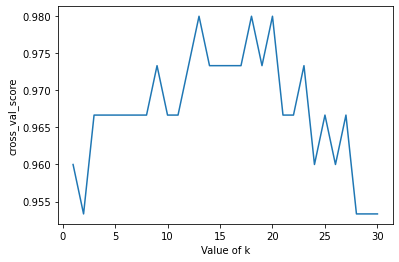

In [42]:
plt.plot(k_range,k_score)
plt.xlabel('Value of k')
plt.ylabel('cross_val_score')

### As we can in graph we get heigh accauracy at K from 12 to 20 , so we choose K=18

In [47]:
knn=KNeighborsClassifier(n_neighbors=18)
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(score.mean())

0.9800000000000001


## CrossValidation for Model Selection

### Here  we will choose which model which is best fit to our data using crossvalidation 
#### First we use KNN and then we use Logisticregression 

In [48]:
knn=KNeighborsClassifier(n_neighbors=18)
score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(score.mean())

0.9800000000000001


In [52]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
score=cross_val_score(logit,x,y,cv=10,scoring='accuracy')
print(score.mean())

C:\Users\wasim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wasim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9733333333333334


C:\Users\wasim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### As we can see KNN give better accuarcy